# 1. Introduction

Welcome to this notebook on the classification of handwritten digits using the MNIST dataset and the Keras sequential model! The MNIST dataset is a classic benchmark in machine learning and computer vision, consisting of 60,000 training images and 10,000 test images of handwritten digits (0-9). Each image has a size of 28x28 pixels in shades of gray.

This laptop does not provide the best model and how to get the best score. But despite this, this dataset will be a great start if you don't know where to start.

## Why Keras?
Karas is a high-level neural network API written in Python and capable of running on top of TensorFlow, TABLE, or Theano. It is designed for quick experimentation, which makes it an excellent choice for both beginners and experienced practitioners. The sequential model API in Keras allows you to quickly and easily create neural networks layer by layer.

Let's dive into the work and start creating our MNIST classifier!

# 2. Data Loading and Preprocessing

In the first cell, libraries are imported, and then all of the files in the `/kaggle/input` folder are listed so that we know what files we have and how to get to them.

The `os.walk()` function is a generator that "walks" through every file and folder in the given folder, `/kaggle/input`. It returns a sequence of folders (directories), and for each directory, provides a list of subdirectories and files and the directory. The outer loop goes through each "walked" directory, and the inner loop goes through all of the files in the walked directory, and this information is printed.

### Documentation

- [numpy](https://numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [seaborn](https://seaborn.pydata.org/)
- [os.walk()](https://docs.python.org/3.9/library/os.html#os.walk)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [37]:
sample_submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
df_train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df_test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

## DataType Analysis

These are the files provided for the contest.

- sample_submission shows what the submission file should look like. It has two columns, the first being the image ID, and the second being the label your model chose for the image.
- df_train is the training data. It has a label column followed by 784 pixel columns.
- df_test is the test data. It has no label column, only pixel columns. These are the images you identify and put the labels for in the submission file.

In [38]:
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [39]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
print(df_test.shape, df_train.shape)

(28000, 784) (42000, 785)


## Digit Visualization

This code shows us some of the images in the training set using MatPlotLib. The `plt.subplots()` function creates a figure that contains 5 subplots, known as axes. The loop goes to each of the axes using the enumerate function, which returns a tuple containing the index of the ax subplot and the ax subplot itself.

Each subplot uses `imshow` to display the pixels from columns 1 to the end of a row of data, and column 0 is used for the title of the subplot.

### Documentation

- [plt.subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
- [enumerate()](https://docs.python.org/3/library/functions.html#enumerate)
- [imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

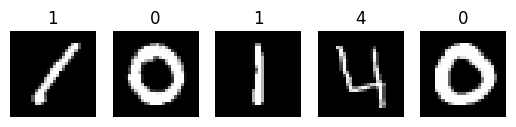

In [42]:
# Plot 5 sample digits
fig, axes = plt.subplots(1, 5)
for i, ax in enumerate(axes):
    ax.imshow(df_train.iloc[i, 1:].to_numpy().reshape(28, 28), cmap='gray')
    ax.set_title(df_train.iloc[i, 0])
    ax.axis('off')
plt.show()

## Preprocessing

The dataframe containing the training data is split into two NumPy arrays. `X` contains all of the columns except the label, and `y` contains the labels.
Then `X` is reshaped into a series of 28x28x1 arrays, and `y` is transformed from a 0-9 integer to a one-hot encoding of an array of ten ones and zeros.
[One-hot encoding](https://en.wikipedia.org/wiki/One-hot) is used to represent categories using an array with a length matching the number of categories.
The category is marked with a one in the
position of the array corresponding to the category, and zeros in the other positions.

In the third cell below, `X` and `y` are split into training and validating sets.

### Documentation

- [Dataframe.drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
- [np.reshape()](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)
- [keras.utils.to_categorical()](https://keras.io/api/utils/python_utils/#tocategorical-function)
- [sklearn.model_selection.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [43]:
from tensorflow.keras.utils import to_categorical  # One-hot encode

X = df_train.drop('label', axis=1).to_numpy()
y = df_train['label'].to_numpy()

# Normalize the pixel values  [0, 255] -> [0, 1]
X = X / 255.0

X = X.reshape(-1, 28, 28, 1) 

y = to_categorical(y, 10)

In [44]:
print(y[:10])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [45]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Building and Training a Baseline Model

## Create the Keras Sequental Model

Here we create our first attempt at a model, which has a single dense hidden layer of 128 neurons. To feed this layer, we have an input layer that takes 28x28x1 input arrays, which is what our training data consists of, but a dense layer requires a single-dimension input, so we add a flatten layer to transform the multidimensional input into a single dimension.

Why did we go to the trouble to reshape our data into 28x28x1 if we're going to flatten it here? This is just our first attempt using a simple neural network structure. In later attempts, we will have a structure that can process the multidimensional data.

For the output layer, we use a *softmax* activation function. This regularizes the output values, which could be any value, into probabilities between 0 and 1 such that the probability for all of the ten possible digits adds up to 1.

### Resources

- [Sequential model](https://stackoverflow.com/questions/57751417/what-is-meant-by-sequential-model-in-keras)
- [Flatten layer](https://medium.com/@prudhviraju.srivatsavaya/flatten-layer-implementation-advantage-and-disadvantages-0f8c4ecf5ac5)
- [Softmax function](https://www.pinecone.io/learn/softmax-activation/)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

model = Sequential([
    Input(shape=(28, 28, 1)),  # Use Input layer to specify the input shape
    Flatten(),                 # Flatten the input
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons.
])

### Model Structure visualization

- [keras.utils.plot_model()](https://keras.io/api/utils/model_plotting_utils/)

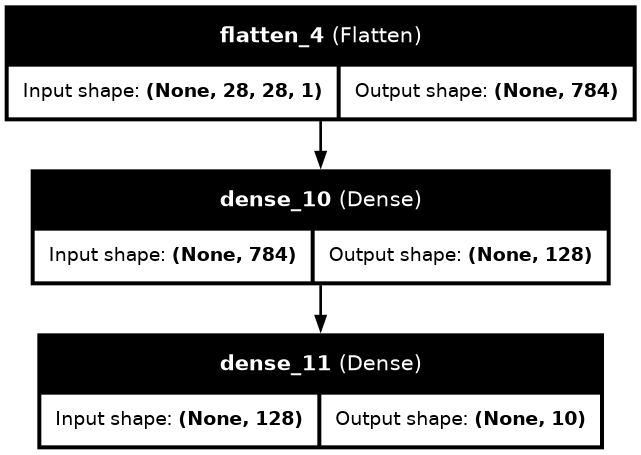

In [47]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=96, rankdir='TB')

### Compile and run the model

Next, we'll compile the model. Compiling a model is a crucial step in preparing it for training. During this process, we specify several key components that define how the model will learn from the data. When we run the model, it outputs history information that we can capture and graph to see how well it worked.

- [Keras model training API](https://keras.io/api/models/model_training_apis/)
- [Video: Intuitively Understanding the Cross Entropy Loss](https://youtu.be/Pwgpl9mKars)

In [48]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [49]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8546 - loss: 0.5310 - val_accuracy: 0.9429 - val_loss: 0.1913
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9532 - loss: 0.1596 - val_accuracy: 0.9571 - val_loss: 0.1442
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9684 - loss: 0.1053 - val_accuracy: 0.9671 - val_loss: 0.1149
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9779 - loss: 0.0765 - val_accuracy: 0.9655 - val_loss: 0.1100
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9827 - loss: 0.0607 - val_accuracy: 0.9671 - val_loss: 0.1162
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9867 - loss: 0.0437 - val_accuracy: 0.9700 - val_loss: 0.1010
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9907 - loss: 0.0332 - val_accuracy: 0.9699 - val_loss: 0.1001
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9939 - loss: 0.0237 - 

## Training history visualization

Here we define a function to plot the history data captured from the `model.fit()` function call. We put all of this in a function so that we can use it for the different iterations of our model through the rest of this notebook.

Notice that the `history` variable has columns for accuracy, val_accuracy, loss, and val_loss. We are interested in loss values because that is what the training algorithm is trying to minimize. We are also interested in accuracy because that is how entries are ranked in the contest. For each metric, we plot the value for the training data alongside the value of the validation data. The training loss is what the training algorithm is trying to minimize, but the validation loss and accuracy tell us how well the model should perform with any given data, including the contest data, so the validation accuracy is what we ultimately want to maximize.

In [50]:
def history_plot(history, model_name='Model'):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left');

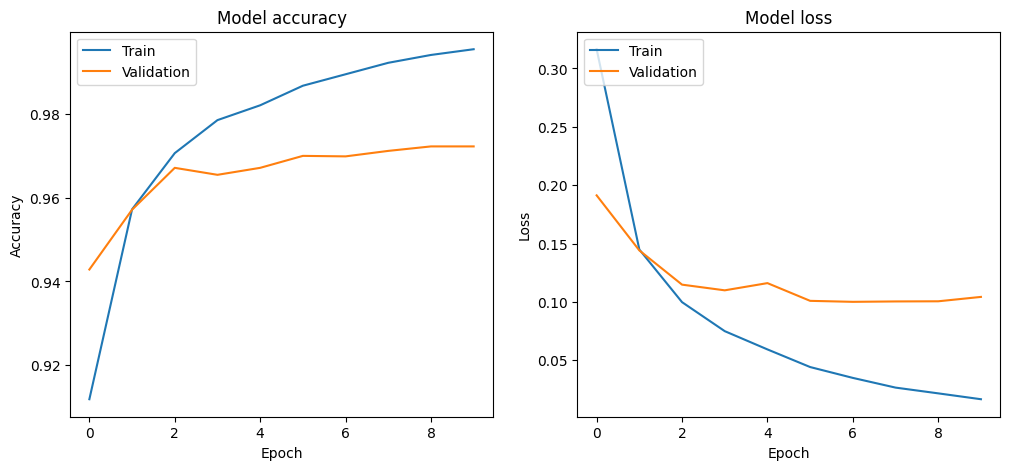

In [51]:
history_plot(history)

# 4. Improving the Model

## Adding More Layers

First, let's add more hidden layers to our model. Increasing the depth of the network can help it learn more complex patterns in the data.

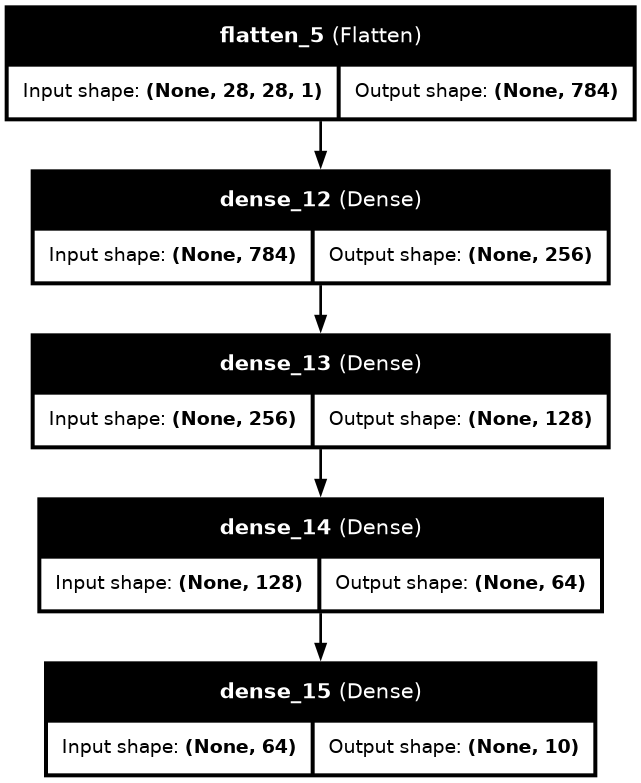

In [52]:
from tensorflow.keras.layers import Dropout

# Define a deeper model
model_deep = Sequential([
    Input(shape=(28, 28, 1)),  # Input layer with the specified shape
    Flatten(),                  # Flatten the input
    Dense(256, activation='relu'),      # First hidden layer with 256 neurons
    Dense(128, activation='relu'),      # Second hidden layer with 128 neurons
    Dense(64, activation='relu'),       # Third hidden layer with 64 neurons
    Dense(10, activation='softmax')     # Output layer with 10 neurons
])

plot_model(model_deep, show_shapes=True, show_layer_names=True, dpi=96, rankdir='TB')

In [53]:
model_deep.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_deep = model_deep.fit(X_train, y_train,
                               validation_data=(X_val, y_val),
                               epochs=10,
                               batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8587 - loss: 0.4809 - val_accuracy: 0.9495 - val_loss: 0.1682
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9644 - loss: 0.1147 - val_accuracy: 0.9671 - val_loss: 0.1023
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9756 - loss: 0.0752 - val_accuracy: 0.9682 - val_loss: 0.1052
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9835 - loss: 0.0532 - val_accuracy: 0.9700 - val_loss: 0.1015
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9871 - loss: 0.0384 - val_accuracy: 0.9702 - val_loss: 0.1073
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9893 - loss: 0.0333 - val_accuracy: 0.9725 - val_loss: 0.1007
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9909 - loss: 0.0295 - val_accuracy: 0.9738 - val_loss: 0.1000
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9939 - loss: 0.0189 - 

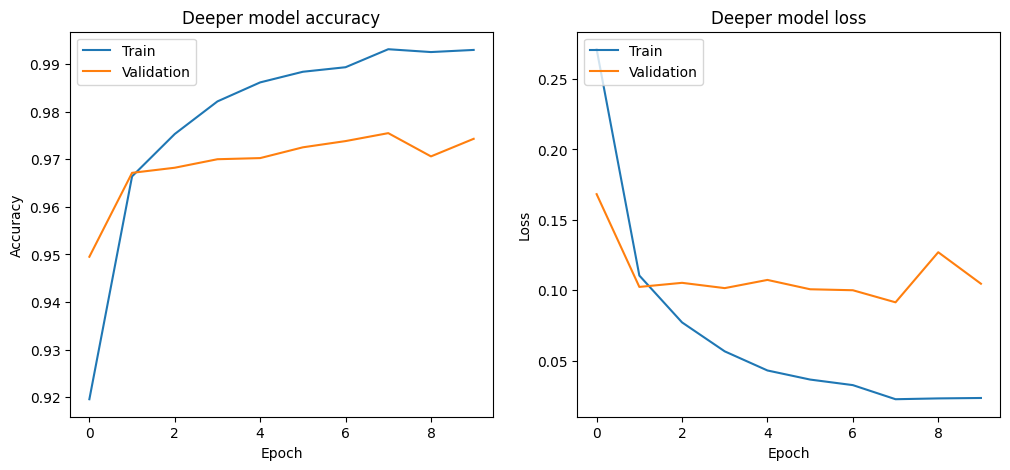

In [54]:
history_plot(history_deep, model_name='Deeper model')

## Using Convolutional Layers

Next, we'll add convolutional layers to our model. Convolutional layers are particularly effective for image data as they can capture spatial hierarchies in the data.

### Resources

- [Video: Introducing Convolutions: Intuition + Convolution Theorem](https://www.youtube.com/watch?v=N-zd-T17uiE)
- [An Introduction to Convolutional Neural Networks (CNNs)](https://www.datacamp.com/tutorial/introduction-to-convolutional-neural-networks-cnns)

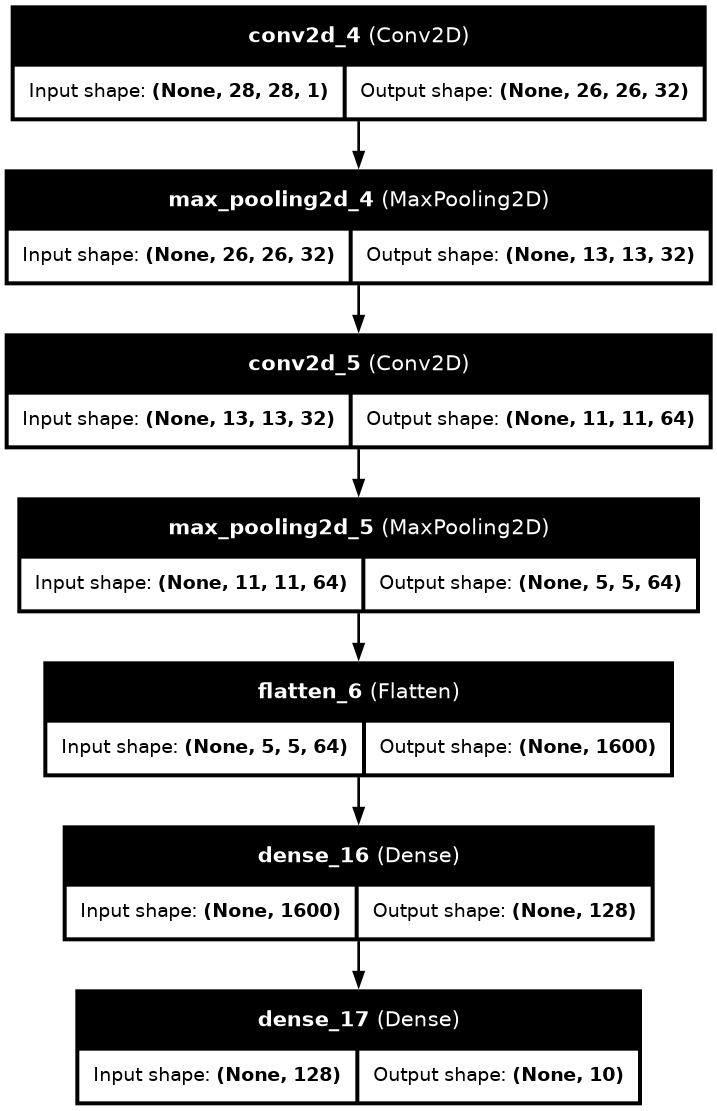

In [55]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define a model with convolutional layers
model_conv = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),                          # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Flatten(),                                                                  # Flatten the output
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dense(10, activation='softmax')                                             # Output layer
])

plot_model(model_conv, show_shapes=True, show_layer_names=True, dpi=96, rankdir='TB')

In [56]:
model_conv.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


history_conv = model_conv.fit(X_train, y_train,
                              validation_data=(X_val, y_val),
                              epochs=10,
                              batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.8779 - loss: 0.4030 - val_accuracy: 0.9775 - val_loss: 0.0743
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9814 - loss: 0.0577 - val_accuracy: 0.9810 - val_loss: 0.0615
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9880 - loss: 0.0382 - val_accuracy: 0.9839 - val_loss: 0.0504
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9925 - loss: 0.0263 - val_accuracy: 0.9870 - val_loss: 0.0399
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9950 - loss: 0.0175 - val_accuracy: 0.9875 - val_loss: 0.0383
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9949 - loss: 0.0159 - val_accuracy: 0.9889 - val_loss: 0.0368
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9958 - loss: 0.0107 - val_accuracy: 0.9864 - val_loss: 0.0518
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9959 -

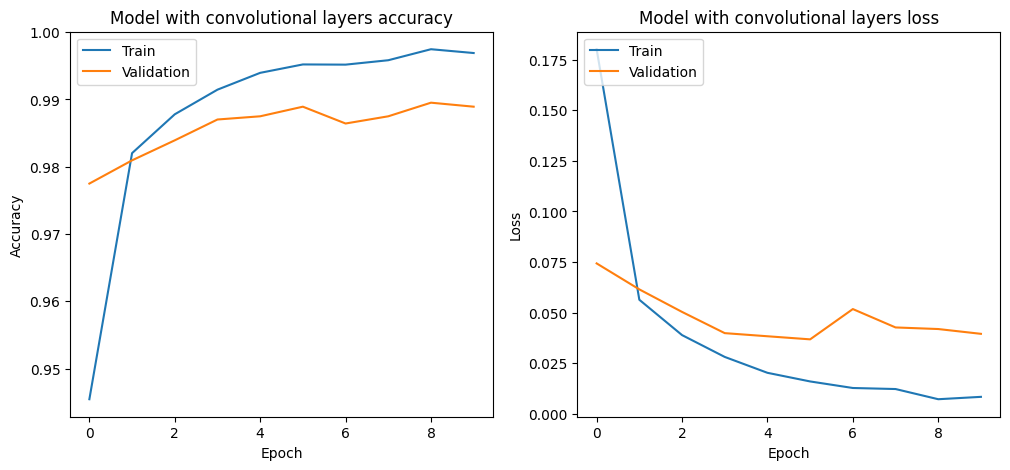

In [57]:
history_plot(history_conv, model_name='Model with convolutional layers')

## Applying Regularization

To prevent overfitting, we can apply regularization techniques such as Dropout. Dropout randomly sets a fraction of input units to 0 at each update during training, which helps prevent the model from becoming too reliant on any single feature.

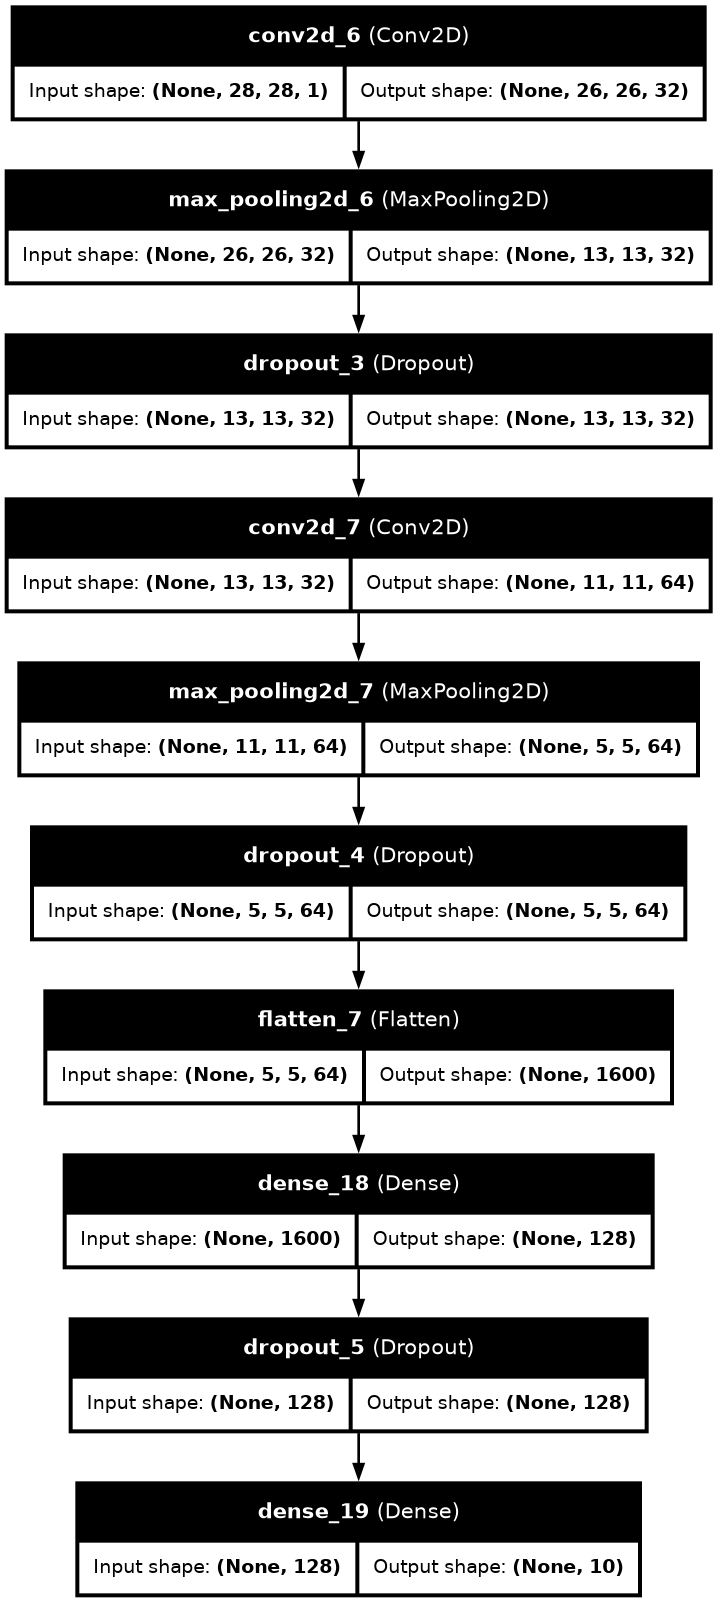

In [58]:
# Define a model with dropout
model_dropout = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),                          # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Dropout(0.25),                                                              # Dropout layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Dropout(0.25),                                                              # Dropout layer
    Flatten(),                                                                  # Flatten the output
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dropout(0.5),                                                               # Dropout layer
    Dense(10, activation='softmax')                                             # Output layer
])

plot_model(model_dropout, show_shapes=True, show_layer_names=True, dpi=96, rankdir='TB')

In [59]:
model_dropout.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_dropout = model_dropout.fit(X_train, y_train,
                                    validation_data=(X_train, y_train),
                                    epochs=10,
                                    batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - accuracy: 0.7754 - loss: 0.6830 - val_accuracy: 0.9759 - val_loss: 0.0764
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.9578 - loss: 0.1384 - val_accuracy: 0.9857 - val_loss: 0.0469
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.9698 - loss: 0.0971 - val_accuracy: 0.9895 - val_loss: 0.0335
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 27s 26ms/step - accuracy: 0.9743 - loss: 0.0825 - val_accuracy: 0.9908 - val_loss: 0.0279
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - accuracy: 0.9765 - loss: 0.0760 - val_accuracy: 0.9929 - val_loss: 0.0231
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - accuracy: 0.9804 - loss: 0.0649 - val_accuracy: 0.9937 - val_loss: 0.0195
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.9823 - loss: 0.0572 - val_accuracy: 0.9951 - val_loss: 0.0170
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.9832 -

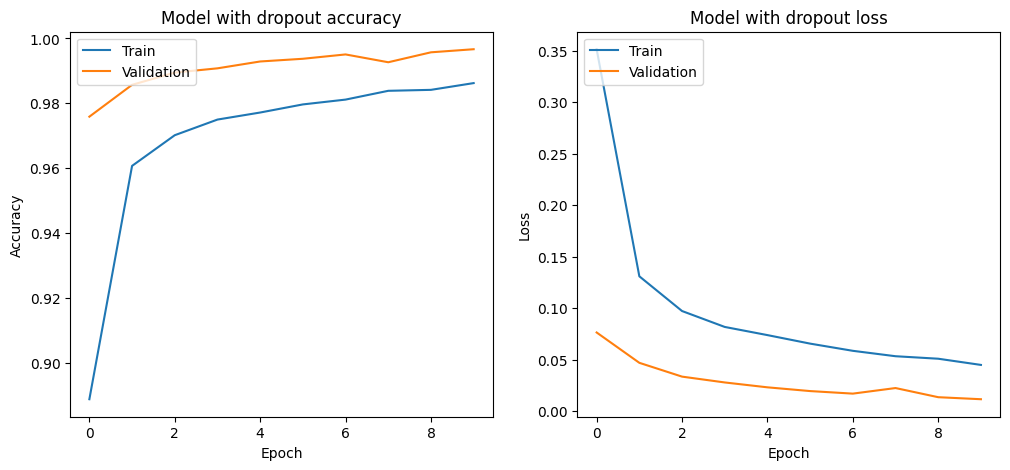

In [60]:
history_plot(history_dropout, model_name='Model with dropout')

In [61]:
best_model = model_dropout

# 5. Results

## Best Model Val Predictions

In [62]:
y_val_pred = best_model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


## Accuracy & Loss

In [63]:
test_loss, test_accuracy = best_model.evaluate(X_val, y_val, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 0.02828756906092167
Test Accuracy: 0.9904761910438538


## Confusion Matrix

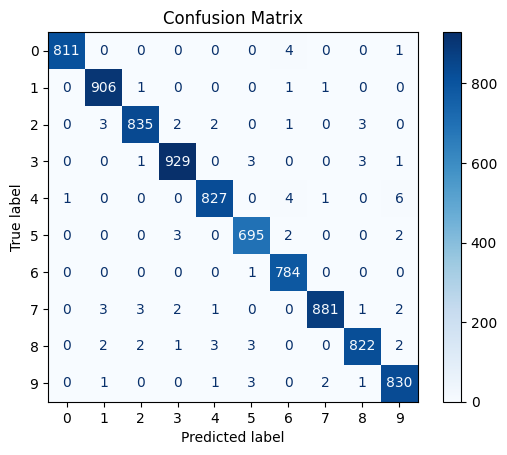

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# 6. Predictions

In [65]:
X_test = df_test.values

X_test = X_test / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) 

In [66]:
y_final_pred = best_model.predict(X_test)
y_final_pred_classes = np.argmax(y_final_pred, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [67]:
y_final_pred[:5]

array([[9.2957655e-11, 7.9969913e-11, 9.9999994e-01, 1.2444841e-08,
        4.8595232e-11, 1.2250058e-15, 1.1812238e-12, 6.2139609e-09,
        3.0051642e-11, 1.2162283e-12],
       [9.9999636e-01, 3.9580096e-13, 6.7765153e-09, 8.2538670e-11,
        7.8325302e-10, 1.0922613e-06, 2.4726385e-06, 3.4221854e-09,
        1.1609316e-09, 4.6258670e-08],
       [2.3045812e-09, 9.4538750e-09, 9.9764904e-08, 1.7578294e-06,
        6.9862010e-04, 2.5035874e-07, 1.9364468e-10, 4.1467035e-07,
        1.6083516e-04, 9.9913800e-01],
       [2.1192757e-02, 3.5138264e-08, 4.3518504e-04, 3.4352601e-05,
        8.1807416e-04, 1.4246099e-05, 3.5998783e-05, 6.9506001e-04,
        7.3669275e-05, 9.7670054e-01],
       [6.5044983e-11, 3.4886590e-08, 5.7253084e-05, 9.9992961e-01,
        2.9102651e-13, 2.7924032e-09, 2.4845789e-11, 6.1830581e-09,
        1.3120900e-05, 1.6091399e-09]], dtype=float32)

In [68]:
y_final_pred_classes[:5]

array([2, 0, 9, 9, 3])

## Write results to the new file

In [69]:
list(sample_submission)

['ImageId', 'Label']

In [70]:
submission = pd.DataFrame({
    'ImageId': np.arange(1, len(y_final_pred_classes) + 1),
    'Label': y_final_pred_classes
})

submission.to_csv('submission.csv', index=False)

print("Results have been saved to 'submission.csv'")

Results have been saved to 'submission.csv'
